In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the two tables
customer_behavior = pd.read_csv('customer_behavior.csv')
shipping_trends = pd.read_csv('shopping_trends.csv')

# Merge the tables on Customer ID
data = pd.merge(customer_behavior, shipping_trends, on='Customer ID', how='inner')



# Check the result
print(data.shape)  # This will show the number of rows after removing duplicates


(3900, 36)


In [15]:
# Drop duplicate columns (e.g., 'Age_y', 'Gender_y', etc.)
data = data.drop(columns=['Age_y', 'Gender_y', 'Item Purchased_y', 'Category_y', 'Purchase Amount (USD)_y',
                          'Location_y', 'Size_y', 'Color_y', 'Season_y', 'Review Rating_y', 'Subscription Status_y',
                          'Payment Method_y', 'Shipping Type_y', 'Discount Applied_y', 'Promo Code Used_y', 
                          'Previous Purchases_y', 'Frequency of Purchases_y'])


In [16]:
print(data.head(5))

   Customer ID  Age_x Gender_x Item Purchased_x Category_x  \
0            1     55     Male           Blouse   Clothing   
1            2     19     Male          Sweater   Clothing   
2            3     50     Male            Jeans   Clothing   
3            4     21     Male          Sandals   Footwear   
4            5     45     Male           Blouse   Clothing   

   Purchase Amount (USD)_x     Location_x Size_x    Color_x Season_x  \
0                       53       Kentucky      L       Gray   Winter   
1                       64          Maine      L     Maroon   Winter   
2                       73  Massachusetts      S     Maroon   Spring   
3                       90   Rhode Island      M     Maroon   Spring   
4                       49         Oregon      M  Turquoise   Spring   

   Review Rating_x Subscription Status_x Shipping Type_x Discount Applied_x  \
0              3.1                   Yes         Express                Yes   
1              3.1                  

In [17]:
 #Preprocessing: Handling missing values (if any)
data = data.dropna()  # You can also choose to impute missing values instead



# Assuming the column with non-numeric values is 'shipping_frequency'
label_encoder = LabelEncoder()

# Convert the categorical values to numeric (e.g., 'Fortnightly' -> 1, 'Weekly' -> 2, 'Monthly' -> 3)
data['Frequency of Purchases_x'] = label_encoder.fit_transform(data['Frequency of Purchases_x'])

# Check the transformed column


# Feature Engineering: Create new features (if needed)
# For example, you could combine customer purchase frequency and shipping frequency
data['total_activity'] = data['Frequency of Purchases_x']
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Frequency of Purchases_x','total_activity']])


In [23]:
data.head()

,Customer ID,Age_x,Gender_x,Item Purchased_x,Category_x,Purchase Amount (USD)_x,Location_x,Size_x,Color_x,Season_x,...,Discount Applied_x,Promo Code Used_x,Previous Purchases_x,Payment Method_x,Frequency of Purchases_x,Preferred Payment Method,total_activity,Cluster,PCA1,PCA2
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,3,Venmo,3,2,0.017783,7.281841e-19
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,3,Cash,3,2,0.017783,7.281841e-19
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,6,Credit Card,6,1,2.140905,-5.425497e-17
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,6,PayPal,6,1,2.140905,-5.425497e-17
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,0,PayPal,0,4,-2.105338,-7.293468e-17


/Users/abdul-malikmustapha/jupyter_env/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/abdul-malikmustapha/jupyter_env/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/abdul-malikmustapha/jupyter_env/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


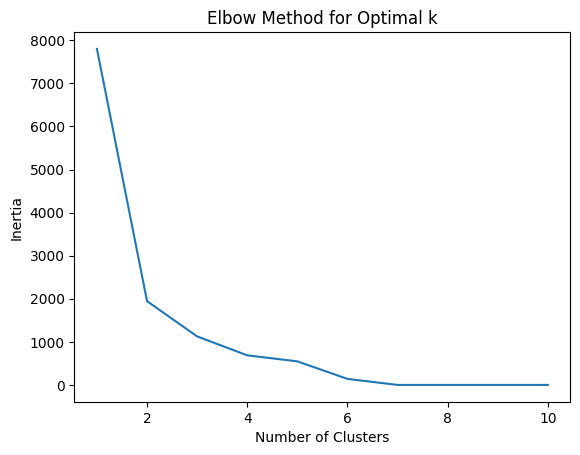

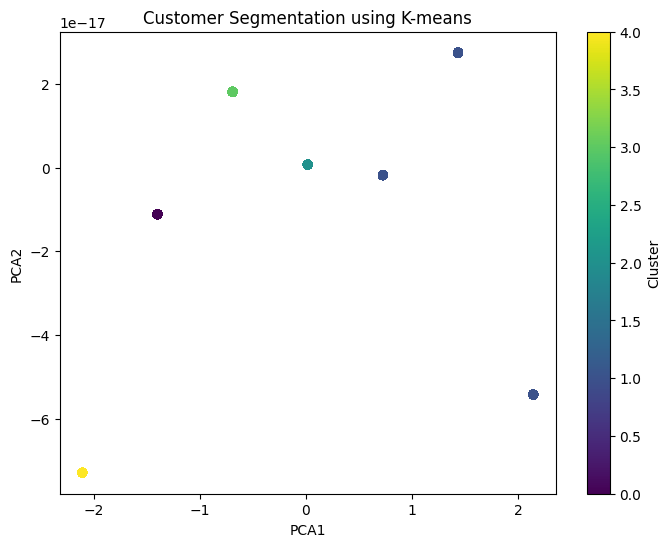

Cluster Centers: [[-0.98827447 -0.98827447]
 [ 1.00919081  1.00919081]
 [ 0.01257477  0.01257477]
 [-0.48784985 -0.48784985]
 [-1.48869909 -1.48869909]]


In [21]:

# Determine the optimal number of clusters using the Elbow Method
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Elbow Method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method to choose optimal k
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 2: Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the data
data['Cluster'] = kmeans.labels_

# Step 3: Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Step 4: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segmentation using K-means')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Show cluster centers (features that define each segment)
print("Cluster Centers:", kmeans.cluster_centers_)






Insights:
Cluster 1:

Coordinates: [-0.988, -0.988] (Low engagement Customers)
This cluster is centered in the negative region for both principal components. It could represent customers who have lower values in the features contributing to the first and second principal components.
Cluster 2:

Coordinates: [1.009, 1.009] (High engagement customers)
This cluster is centered in the positive region for both principal components. It could represent customers who have higher values in the features contributing to the first and second principal components.
Cluster 3:

Coordinates: [0.0125, 0.0125] (Average engagement customers)
This cluster is centered near the origin, meaning the customers in this cluster have values that are close to the average values for the two principal components.
Cluster 4:

Coordinates: [-0.4878, -0.4878] (Moderately low engagement customers)
This cluster is also in the negative region but not as extreme as Cluster 1. It could represent customers with a moderately lower value for the principal components.
Cluster 5:

Coordinates: [-1.4887, -1.4887] (Least engaged customers)
This cluster is similar to Cluster 1 but more extreme in the negative direction for both components. It could represent customers with very low values in the features contributing to these components.
                                                                                                                                       
Recommendations:
Target Cluster 2 with loyalty rewards since they are our best customers
Target Cluster 3 with personalized offers to keep them spending 
Target Cluster 1 & 4 with promotional items to increase engagement
    Target Cluster 5 with surveys to understand why these groups are not spending

                                                                                                                                       
